# Hand-Controller - Visão Computacional

#### Grupo: Antonio Fuziy e Victor Vergara

___

In [31]:
import cv2
import time
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

In [32]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
hands_videos = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

In [33]:
def detectHandsLandmarks(image, hands, draw=True, display = True):
    output_image = image.copy()
    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(imgRGB)
    if results.multi_hand_landmarks and draw:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                image = output_image,
                landmark_list = hand_landmarks,
                connections = mp_hands.HAND_CONNECTIONS,
                landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),thickness=2, circle_radius=2),
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius=2)
            )
            
    if display:
        plt.figure(figsize=[15,15])
        plt.subplot(121)
        plt.imshow(image[:,:,::-1])
        plt.title("Original Image")
        plt.axis('off');
        plt.subplot(122)
        plt.imshow(output_image[:,:,::-1])
        plt.title("Output")
        plt.axis('off')
        
    else:
        return output_image, results              

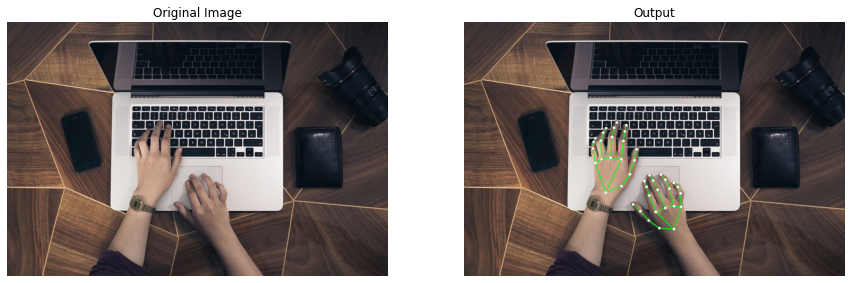

In [34]:
image = cv2.imread('img/sample.jpg')
detectHandsLandmarks(image, hands, display=True)

In [35]:
def countFingers(image, results, draw=True, display=True):
    height, width, _ = image.shape
    output_image = image.copy()
    count = {'RIGHT': 0, 'LEFT': 0}
    
    fingers_tips_ids = [mp_hands.HandLandmark.INDEX_FINGER_TIP, mp_hands.HandLandmark.MIDDLE_FINGER_TIP,
                        mp_hands.HandLandmark.RING_FINGER_TIP, mp_hands.HandLandmark.PINKY_TIP]
    
    fingers_statuses = {'RIGHT_THUMB': False, 'RIGHT_INDEX': False, 'RIGHT_MIDDLE': False, 'RIGHT_RING': False,
                        'RIGHT_PINKY': False, 'LEFT_THUMB': False, 'LEFT_INDEX': False, 'LEFT_MIDDLE': False,
                        'LEFT_RING': False, 'LEFT_PINKY': False}
    
    for hand_index, hand_info in enumerate(results.multi_handedness):
        hand_label = hand_info.classification[0].label
        hand_landmarks =  results.multi_hand_landmarks[hand_index]
        
        for tip_index in fingers_tips_ids:
            finger_name = tip_index.name.split("_")[0]
            if (hand_landmarks.landmark[tip_index].y < hand_landmarks.landmark[tip_index - 2].y):
                fingers_statuses[hand_label.upper()+"_"+finger_name] = True
                count[hand_label.upper()] += 1
        
        thumb_tip_x = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x
        thumb_mcp_x = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP - 2].x
        
        if (hand_label=='Right' and (thumb_tip_x < thumb_mcp_x)) or (hand_label=='Left' and (thumb_tip_x > thumb_mcp_x)):
            fingers_statuses[hand_label.upper()+"_THUMB"] = True
            count[hand_label.upper()] += 1
            
    if draw:
        cv2.putText(output_image, " Total Fingers: ", (10, 25),cv2.FONT_HERSHEY_COMPLEX, 1, (20,255,155), 2)
        cv2.putText(output_image, str(sum(count.values())), (width//2-150,240), cv2.FONT_HERSHEY_SIMPLEX,
                    8.9, (20,255,155), 10, 10)

    if display:
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1])
        plt.title("Output Image")
        plt.axis('off')
    else:
        return output_image, fingers_statuses, count

___
## RUN THIS CELL TO RUN COMMANDS

In [36]:
def recognizeGestures(image, fingers_statuses, count, draw=True, display=True):
    output_image = image.copy()
    hands_labels = ['RIGHT', 'LEFT']
    hands_gestures = {'RIGHT': "UNKNOWN", 'LEFT': "UNKNOWN"}
    
    for hand_index, hand_label in enumerate(hands_labels):
        color = (0, 0, 255)
        if count[hand_label] == 2  and fingers_statuses[hand_label+'_MIDDLE'] and fingers_statuses[hand_label+'_INDEX']:
            hands_gestures[hand_label] = "V SIGN"
            color=(0,255,0)
            
        elif count[hand_label] == 3 and fingers_statuses[hand_label+'_THUMB'] and fingers_statuses[hand_label+'_INDEX'] and fingers_statuses[hand_label+'_PINKY']:
            hands_gestures[hand_label] = "SPIDERMAN SIGN"
            color=(0,255,0)
            
        elif count[hand_label] == 5:
            hands_gestures[hand_label] = "HIGH-FIVE SIGN"
            color=(0,255,0)
            
        if draw:
            cv2.putText(output_image, hand_label +': '+ hands_gestures[hand_label] , (10, (hand_index+1) * 60), cv2.FONT_HERSHEY_PLAIN, 4, color, 5)
            
    if display:
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1])
        plt.title("Output Image")
        plt.axis('off')
        
    else:
        return output_image, hands_gestures

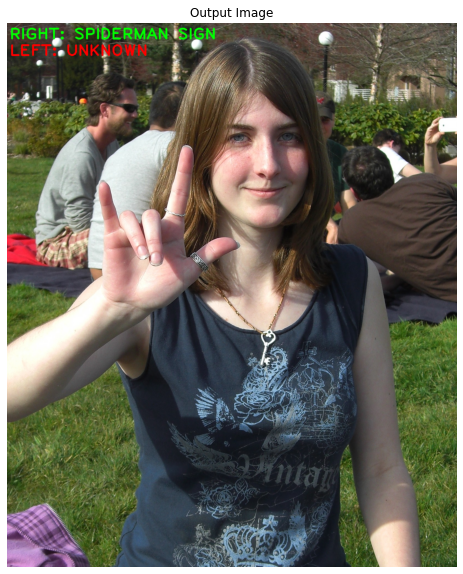

In [37]:
image = cv2.imread('img/sample1.jpg')
flipped_image = cv2.flip(image, 1)
_, results = detectHandsLandmarks(flipped_image, hands, display=False)
if results.multi_hand_landmarks:
    output_image, fingers_statuses, count = countFingers(image, results, draw=False, display = False)
    recognizeGestures(image, fingers_statuses, count)

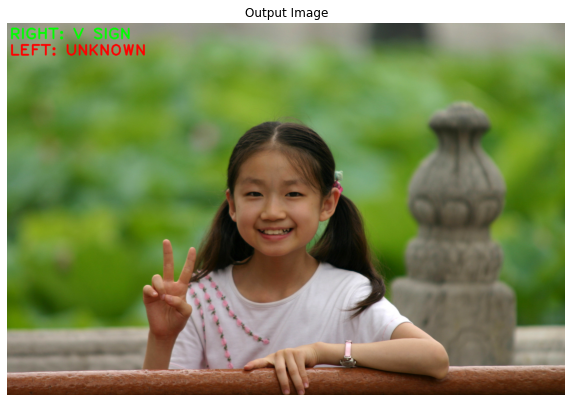

In [38]:
image = cv2.imread('img/sample2.jpg')
flipped_image = cv2.flip(image, 1)
_, results = detectHandsLandmarks(flipped_image, hands, display=False)
if results.multi_hand_landmarks:
    output_image, fingers_statuses, count =countFingers(image, results, draw=False, display = False)
    recognizeGestures(image, fingers_statuses, count)

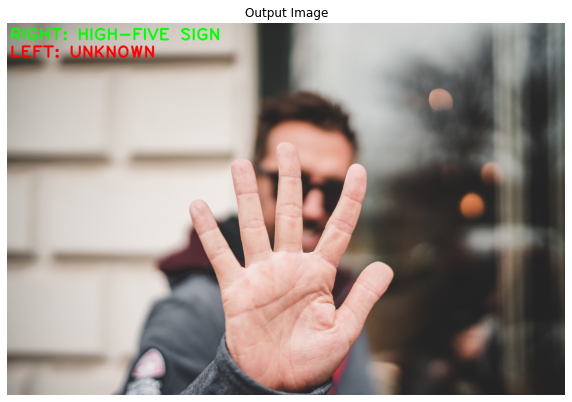

In [39]:
image = cv2.imread('img/sample3.jpg')
flipped_image = cv2.flip(image, 1)
_, results = detectHandsLandmarks(flipped_image, hands, display=False)
if results.multi_hand_landmarks:
    output_image, fingers_statuses, count =countFingers(image, results, draw=False, display = False)
    recognizeGestures(image, fingers_statuses, count)

In [40]:
import tinder_controller as tc

camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

cv2.namedWindow('Selfie-Capturing System', cv2.WINDOW_NORMAL)
filter_imageBGRA = cv2.imread('img/filter.png', cv2.IMREAD_UNCHANGED)
filter_on = False
num_of_frames = 5

counter = {'V SIGN': 0, 'SPIDERMAN SIGN': 0, 'HIGH-FIVE SIGN': 0}

captured_image = None
color=(0,255,0)

while camera_video.isOpened():

    ok, frame = camera_video.read()
    if not ok:
        continue
    
    frame = cv2.flip(frame, 1)
    frame_height, frame_width, _ = frame.shape
    filter_imageBGRA = cv2.resize(filter_imageBGRA, (frame_width, frame_height))
    filter_imageBGR  = filter_imageBGRA[:,:,:-1]
    frame, results = detectHandsLandmarks(frame, hands_videos, draw=False, display=False)
    
    if results.multi_hand_landmarks:
        frame, fingers_statuses, count = countFingers(frame, results, draw=False, display=False)
        _, hands_gestures = recognizeGestures(frame, fingers_statuses, count, draw=False, display=False)
            
        if any(hand_gesture == "HIGH-FIVE SIGN" for hand_gesture in hands_gestures.values()):
            counter['HIGH-FIVE SIGN'] += 1
            if counter['HIGH-FIVE SIGN'] == num_of_frames:
                filter_on = False
                tc.close_window()
                print("5 dedo")
                
                counter['HIGH-FIVE SIGN'] = 0
        else:
            counter['HIGH-FIVE SIGN'] = 0
        
    if captured_image is not None:
        captured_image = cv2.resize(captured_image, (frame_width//5, int(((frame_width//5) / frame_width) * frame_height)))
        img_height, img_width, _ = captured_image.shape
        frame[10: 10+img_height, 10: 10+img_width] = captured_image
        
    cv2.imshow('Selfie-Capturing System', frame)
    k = cv2.waitKey(1) & 0xFF
    if(k == 27):
        break

camera_video.release()
cv2.destroyAllWindows()

AttributeError: module 'tinder_controller' has no attribute 'close_window'